try to plot multiple files in one program

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import os
import glob
#import packages

def getDict(file):
    """This function reads a pickle file 
    and returns the dictionary stored in it"""

    with open(file,'rb') as f:
        SQUID_dict = pkl.load(f)
        #print(type(SQUID_dict.keys()))
    return SQUID_dict

def getPString(dict):
    """This function returns the pathstring from the dictionary"""
    pstring = dict['squid_pstring']
    return pstring

def getUnifiedTrans(dict, u_Vpp = 0.005):
    """This function returns the unified transimpedance from the dictionary"""
    unified_Vpp = u_Vpp
    Trans = dict['transimpedance']
    Vpp = dict['Vpp']
    unified_Trans = unified_Vpp/Vpp*Trans
    return unified_Trans

# calculate the derivative
def getDerivative(x, y):
    dy_forward = np.diff(y) / np.diff(x)
    half_diff = np.diff(x) / 2
    x_mid = x[:-1] + half_diff
    return dy_forward, x_mid


In [43]:
#get all data file from the directory

folder_path = './20240606_010332_tune_squid/data'

# Use glob to list all .SQUID_OUTPUT.pkl files in the directory
# no DFMUXError_data_dump files
pkl_files = glob.glob(os.path.join(folder_path, '*.SQUID_OUTPUT.pkl'))



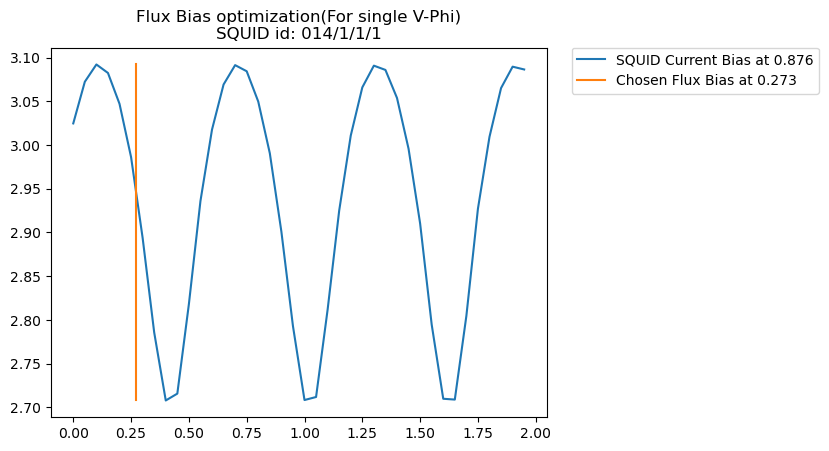

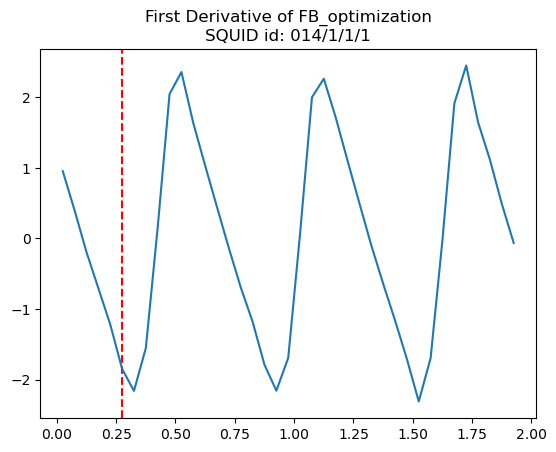

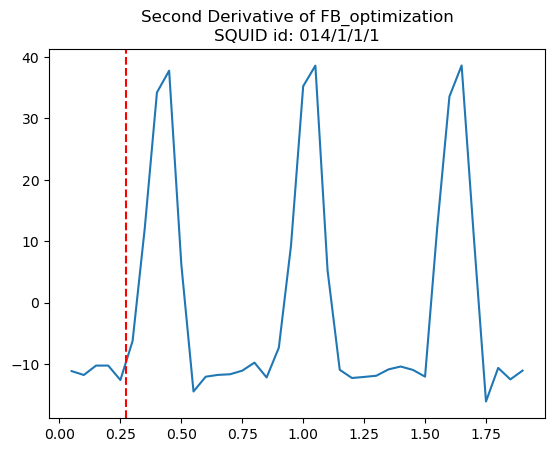

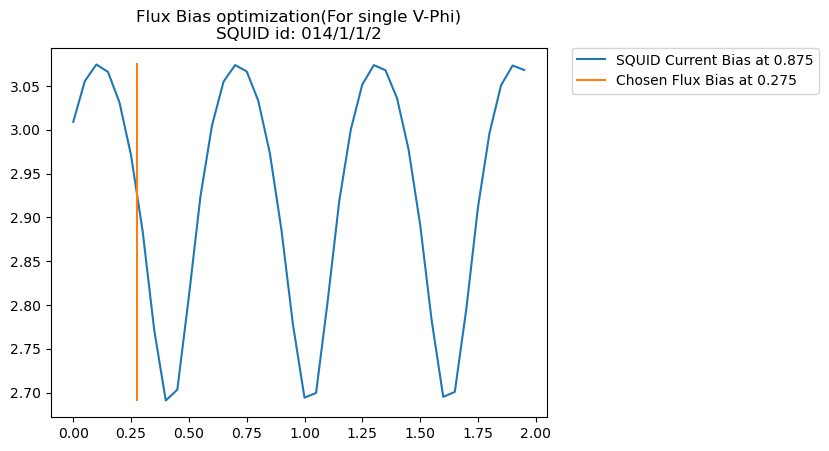

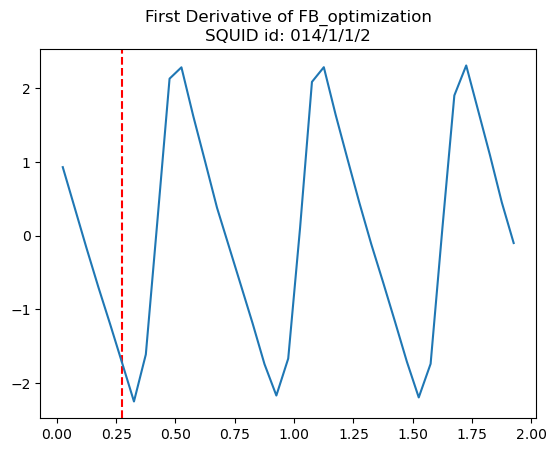

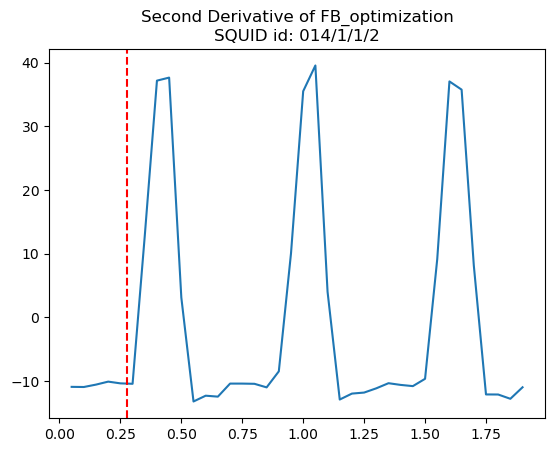

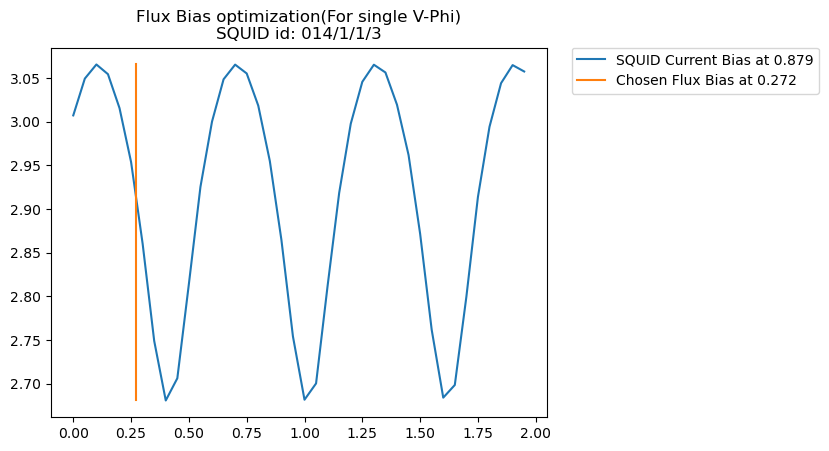

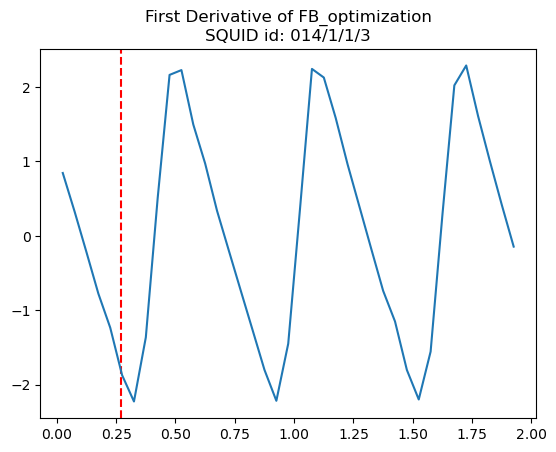

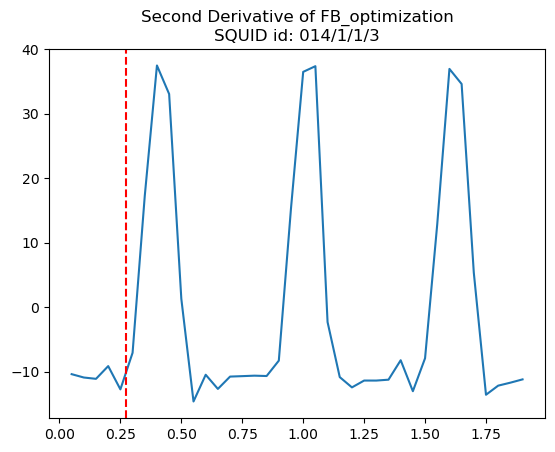

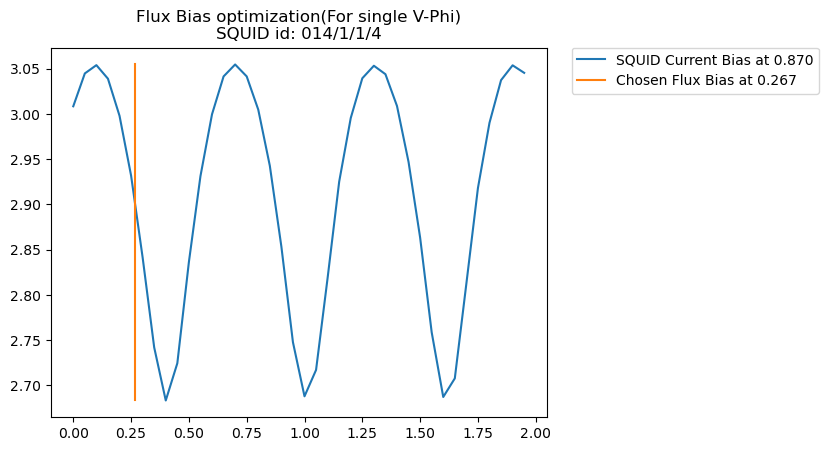

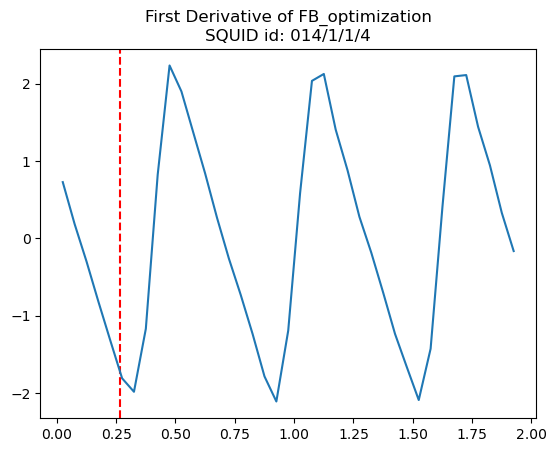

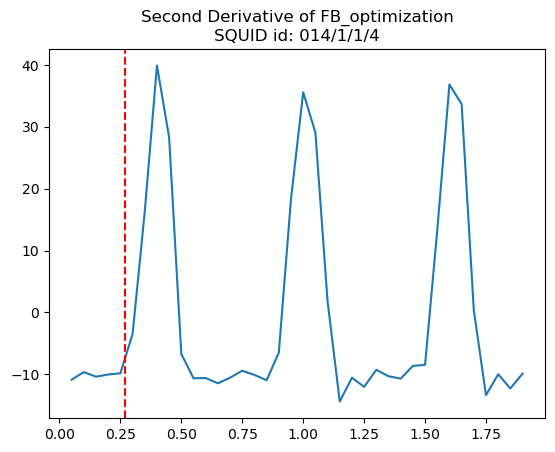

In [61]:
#a empty dictionary to store diff pkl files
data = {}
#print(len(pkl_files))
#save the date to a Dictioanry
for i in range(len(pkl_files)):
    file_name = pkl_files[i].split('\\')[-1]
    #print(file_name)
    data[f'{file_name}'] = getDict(pkl_files[i])
    
    if i > 2:
        break

#print(data)
for file in data:
    SQUID_pstring = getPString(data[file])

    intermediate_vphis = data[file]['intermediate_vphis']
    vphis = intermediate_vphis["vphis"]
    # for key in vphis:
    #     if "CB" in key:
    #         label = vphis[key]['label']
    #         label = label[:33]+" V"
    #         y = vphis[key]['y']
    #         x = vphis[key]['x']
    #         plt.plot(x,y,label = label, marker = 'o')
    # plt.title(f"VPhi Plot for a range of current baises\nSQUID id: {SQUID_pstring}")
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    # plt.show()

    # cb_optimization = data[file]['cb_optimization']
    # for key in cb_optimization:
    #     if "v" in key or "chosen_point" in key:
    #         label = cb_optimization[key]['label']
    #         y = cb_optimization[key]['y']
    #         x = cb_optimization[key]['x']
    #         plt.plot(x,y,label = label)
    # plt.title(f"current baises optimization(VOP2P vs CBV)\nSQUID id: {SQUID_pstring}")
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    # plt.show()

    fb_optimization = data[file]['fb_optimization']

    for key in fb_optimization:

        if "vphi_curve" in key:
            label = fb_optimization[key]['label']
            y = (fb_optimization[key]['y'])
            x = (fb_optimization[key]['x']) 
            plt.plot(x,y,label = label)

            dy, dx = getDerivative(x, y)
            
            ddy, ddx = getDerivative(dx, dy)
        
        if "chosen_point" in key:
            label = fb_optimization[key]['label']
            y_cp = fb_optimization[key]['y']
            x_cp = fb_optimization[key]['x']
            plt.plot(x_cp, y_cp,label = label)        

    plt.title(f"Flux Bias optimization(For single V-Phi)\nSQUID id: {SQUID_pstring}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

    plt.title(f"First Derivative of FB_optimization\nSQUID id: {SQUID_pstring}")
    plt.axvline(x=x_cp[0], color='r', linestyle='--')
    plt.plot(dx,dy)
    plt.show()

    plt.title(f"Second Derivative of FB_optimization\nSQUID id: {SQUID_pstring}")
    plt.plot(ddx, ddy)
    plt.axvline(x=x_cp[0], color='r', linestyle='--')
    plt.show()

